## Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

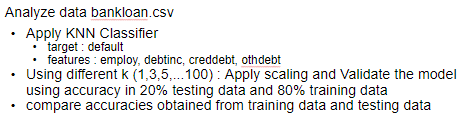

In [3]:
bankloan = pd.read_csv('../data/bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [5]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = 'default'

In [6]:
X = bankloan[fitur]
y = bankloan[target]

> ## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

> ## Standardization Process

In [8]:
X_train

,employ,debtinc,creddebt,othdebt
382,2,16.0,4.003840,3.356160
344,18,13.4,4.521696,5.394304
265,7,6.4,0.630784,0.777216
52,16,12.9,3.032016,3.675984
370,13,9.6,1.875168,3.020832
...,...,...,...,...
476,3,16.3,0.352080,2.581920
135,6,2.2,0.452694,0.801306
506,19,4.7,0.397385,3.785615
684,18,10.5,0.840315,4.724685


In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## NOTES: Scaler process

In [ ]:
xi - min(x)
------------- = .......
max(x) - min(x)

In [ ]:
xi - mean(x)
------------- = ......
    s

In [10]:
X_train.describe()

,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,8.564286,10.303571,1.598840,3.117190
std,6.631049,6.853099,2.149230,3.349780
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.175000,0.369854,1.049471
50%,7.000000,8.800000,0.890707,2.038053
75%,13.000000,14.300000,1.978249,4.005186
max,31.000000,41.300000,20.561310,27.033600


In [13]:
df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
display(X_train)
display(df)

,employ,debtinc,creddebt,othdebt
382,2,16.0,4.003840,3.356160
344,18,13.4,4.521696,5.394304
265,7,6.4,0.630784,0.777216
52,16,12.9,3.032016,3.675984
370,13,9.6,1.875168,3.020832
...,...,...,...,...
476,3,16.3,0.352080,2.581920
135,6,2.2,0.452694,0.801306
506,19,4.7,0.397385,3.785615
684,18,10.5,0.840315,4.724685


,employ,debtinc,creddebt,othdebt
0,0.064516,0.381418,0.194269,0.122668
1,0.580645,0.317848,0.219469,0.198189
2,0.225806,0.146699,0.030127,0.027110
3,0.516129,0.305623,0.146977,0.134519
4,0.419355,0.224939,0.090682,0.110243
...,...,...,...,...
555,0.096774,0.388753,0.016564,0.093980
556,0.193548,0.044010,0.021460,0.028002
557,0.612903,0.105134,0.018769,0.138581
558,0.580645,0.246944,0.040323,0.173377


In [14]:
display(X_train.describe())
display(df.describe())

,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,8.564286,10.303571,1.598840,3.117190
std,6.631049,6.853099,2.149230,3.349780
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.175000,0.369854,1.049471
50%,7.000000,8.800000,0.890707,2.038053
75%,13.000000,14.300000,1.978249,4.005186
max,31.000000,41.300000,20.561310,27.033600


,employ,debtinc,creddebt,othdebt
count,560.000000,560.000000,560.000000,560.000000
mean,0.276267,0.242141,0.077235,0.113814
std,0.213905,0.167557,0.104587,0.124121
min,0.000000,0.000000,0.000000,0.000000
25%,0.096774,0.116748,0.017429,0.037198
50%,0.225806,0.205379,0.042775,0.073828
75%,0.419355,0.339853,0.095698,0.146717
max,1.000000,1.000000,1.000000,1.000000
